In [3]:
# Install necessary libraries
%conda install pandas scikit-learn -c conda-forge

Specs: xeus-python, numpy, matplotlib, pillow, ipywidgets>=8.1.6, ipyleaflet, scipy, pandas, scikit-learn
Channels: https://prefix.dev/emscripten-forge-dev, https://prefix.dev/conda-forge, conda-forge

Solving environment...
Solving took 3.4943999999761584 seconds
  Name                          Version                       Build                         Channel                       
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
+ brotli-python                 1.2.0                         py313h33caa6c_0               https://prefix.dev/emscripten-forge-dev/
+ certifi                       2025.11.12                    pyhd8ed1ab_0                  https://prefix.dev/conda-forge/
+ charset-normalizer            3.4.4                         pyhd8ed1ab_0                  https://prefix.dev/conda-forge/
+ idna                          3.11                          pyhd8ed1ab_0                  https://prefix.dev

In [4]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("tasks.csv")

# Preprocess the data
severity_mapping = {1: "Low", 2: "Medium", 3: "High"}
data["severity"] = data["severity"].map(severity_mapping)
data["isCompleted"] = data["isCompleted"].astype(int)

# Split the data into features and target
X = data[["severity", "dueDate"]]
y = data["isCompleted"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

knn_predictions = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, knn_predictions)
print("KNN Accuracy:", accuracy)

/lib/python3.13/site-packages/sklearn/utils/_param_validation.py:14: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 2.3.3)
  from scipy.sparse import csr_matrix, issparse


<class 'FileNotFoundError'>: [Errno 44] No such file or directory: 'tasks.csv'

## Creating a Database

Line magic is used to create an in-memory database:

In [1]:
%CREATE example_db.db

Currently, there is no ability to:

- save the database to browser storage;
- export the database;
- load a database from browser storage;
- load a database from a URL;
- load a database from the desktop;
- connect to a remote sqlite database file.

## Create and Populate Tables

Tables are created and populated using SQL:

In [2]:
CREATE TABLE players (Name STRING, Class STRING, Level INTEGER, Hitpoints INTEGER)

In [3]:
INSERT INTO players (Name, Class, Level, Hitpoints) VALUES ("Martin Splitskull", "Warrior", 3, 40)

In [4]:
SELECT COUNT(*) as rowcount FROM players

rowcount
1


Only one command can be executed from within a single code cell:

In [5]:
INSERT INTO players (Name, Class, Level, Hitpoints) VALUES ("Sir Wolf", "Cleric", 2, 20);

-- The following will not be inserted
INSERT INTO players (Name, Class, Level, Hitpoints) VALUES ("Sylvain, The Grey", "Wizard", 1, 10);

In [6]:
SELECT Name, Level, Hitpoints FROM players;

Name,Level,Hitpoints
Martin Splitskull,3,40
Sir Wolf,2,20


In [7]:
INSERT INTO players (Name, Class, Level, Hitpoints) VALUES ("Sylvain, The Grey", "Wizard", 1, 10);

In [8]:
SELECT Name, Level, Hitpoints FROM players;

Name,Level,Hitpoints
Martin Splitskull,3,40
Sir Wolf,2,20
"Sylvain, The Grey",1,10


## Querying Tables

A full range of SQL query commands are supported, including aggregation operations:

In [ ]:
SELECT SUM (Level) FROM players

Grouping also works:

In [11]:
SELECT Level, SUM(Hitpoints) AS `Total Hitpoints`
FROM players
GROUP BY Level
ORDER BY `Total Hitpoints` DESC;

Level,Total Hitpoints
3,40
2,20
1,10


## Charting Using Vega

The `jupyter-xeus/xeus-sqlite` kernel also bundles Vega charting components.

Vega charts can be generated by piping the result of a SQL query into a Vega line magic command.

Level,Hitpoints
3,40
2,20
1,10


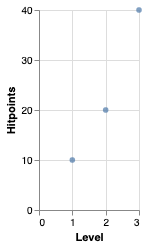

In [12]:
%XVEGA_PLOT
    X_FIELD Level
    Y_FIELD Hitpoints
    MARK circle
    WIDTH 100
    HEIGHT 200
    <>
    SELECT Level, Hitpoints FROM players

## Database Administration

Several line magics are defined to support database administration

In [15]:
%TABLE_EXISTS players

The table players exists.

In [16]:
%TABLE_EXISTS npcs

The table npcs doesn't exist.

In [17]:
%GET_INFO

Magic header string: SQLite format 3
Page size bytes: 4096
File format write version: 1
File format read version: 1
Reserved space bytes: 0
Max embedded payload fraction 64
Min embedded payload fraction: 32
Leaf payload fraction: 32
File change counter: 4
Database size pages: 2
First freelist trunk page: 0
Total freelist trunk pages: 0
Schema cookie: 1
Schema format number: 4
Default page cache size bytes: 0
Largest B tree page number: 0
Database text encoding: 1
User version: 0
Incremental vaccum mode: 0
Application ID: 0
Version valid for: 4
SQLite version: 3032003


## Connecting to a Different Database

Creating a new database will connect the kernel to the new database instance.

In [18]:
%CREATE potato.db 

In [19]:
CREATE TABLE potaters(production INTEGER)

In [20]:
INSERT INTO potaters (production) VALUES (7)

In [21]:
SELECT * FROM potaters

production
7


The original database is lost:

In [23]:
SELECT Name, Level, Hitpoints FROM players;

Error: no such table: players